### Project Name: "Loan Approval Prediction: Analyzing and Modeling Applicant Data for Better Loan Decisions"

### Project Goal

Develop a machine learning model to predict the likelihood of loan approval based on applicant characteristics such as income, employment status, credit history, and loan amount. The goal is to create a reliable predictive tool that can help financial institutions assess the risk associated with loan applications, ensuring more accurate and fair decision-making.

### Dataset Information:
The dataset includes various columns, each providing specific details about loan applicants and their financial profiles. Below is a brief description of each column:

* loan_id: A unique identifier assigned to each loan application.
* no_of_dependants: The number of dependents associated with the applicant.
* education: The education level of the applicant, such as "Graduate" or "Non-Graduate."
* self_employed: Indicates whether the applicant is self-employed ("Yes") or not ("No").
* income_annum: The annual income of the applicant, expressed in currency units.
* loan_amount: The total loan amount requested by the applicant.
* loan_term: The term of the loan, usually expressed in months.
* cibil_score: The credit score of the applicant, which indicates their creditworthiness.
* residential_assets_value: The value of the applicant's residential assets.
* luxury_assets_value: The value of any luxury assets owned by the applicant.
* bank_asset_value: The total value of the applicant's assets in the bank.
* loan_status: The current status of the loan application, indicating whether it was approved or not.

## Step 1: Imports

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
# Load dataset into a dataframe
data = pd.read_csv('loan_approval_dataset.csv')

# Display first few rows of the dataframe
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Gather descriptive statistics about the data

In [4]:
data.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


### Check missing values

In [5]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Check duplicates

In [6]:
data.duplicated().sum()

0

### Rename columns

In [7]:
# Display all column names
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
# Remove spaces at the beginning and end of column names
data.columns = data.columns.str.strip()

# Display all column names after the change
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

### Check outliers

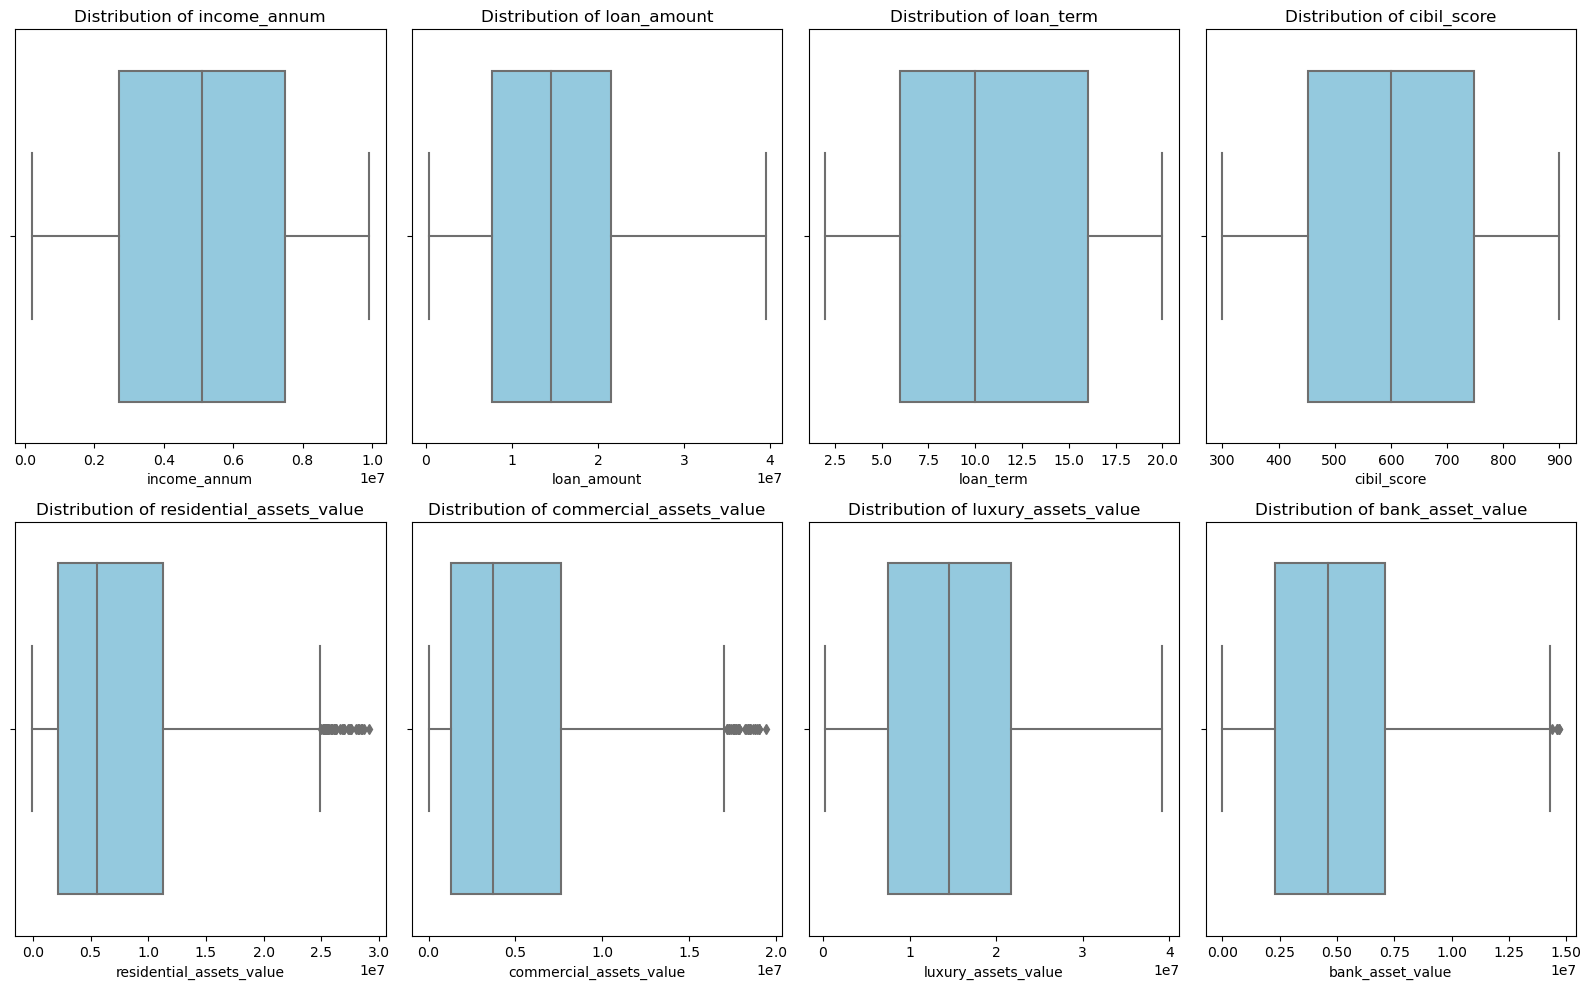

In [9]:
# Create a boxplot to visualize distribution of "Age" and detect any ouliers

columns_to_analyze = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                      'residential_assets_value', 'commercial_assets_value', 
                      'luxury_assets_value', 'bank_asset_value']

plt.figure(figsize=(16, 10))

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

The boxplots reveal that the columns residential_assets_value, commercial_assets_value, and bank_asset_value contain potential outliers.

In [10]:
# Determine the number of rows containing outliers
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q1 + 1.5 * IQR

    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]

    print(f'Column: {column}')
    print(f'Lower_limit: {lower_limit}')
    print(f'Upper_limit: {upper_limit}')
    print(f'Number of outliers: {len(outliers)}\n')
    return outliers

columns_to_check = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

for column in columns_to_check:
    detect_outliers(column)

Column: residential_assets_value
Lower_limit: -11450000.0
Upper_limit: 15850000.0
Number of outliers: 546

Column: commercial_assets_value
Lower_limit: -8150000.0
Upper_limit: 10750000.0
Number of outliers: 549

Column: bank_asset_value
Lower_limit: -4900000.0
Upper_limit: 9500000.0
Number of outliers: 459



The analysis using the interquartile range (IQR) method revealed a significant number of outliers in the columns residential_assets_value, commercial_assets_value, and bank_asset_value. Specifically, 546 outliers were detected in residential_assets_value, 549 in commercial_assets_value, and 459 in bank_asset_value. These outliers represent extreme values that may influence the analysis and modeling process.

In [11]:
import warnings
warnings.filterwarnings('ignore')

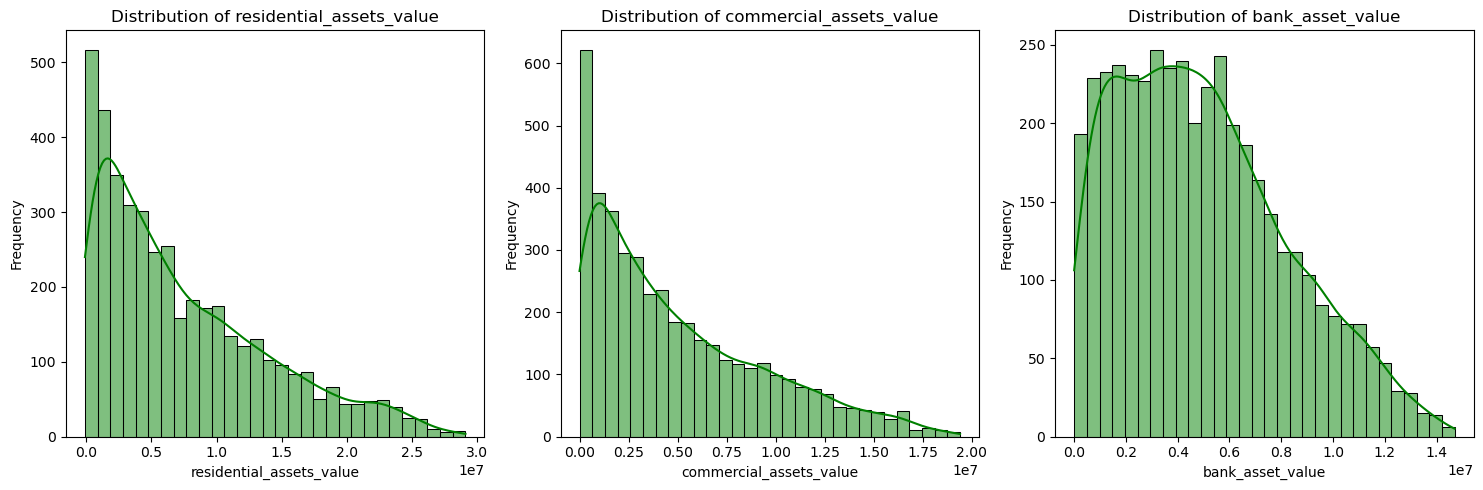

In [12]:
# Check the distribution of these columns to better understand how to transform outliers
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Since the data has a right-skewed distribution, applying a logarithmic transformation is an appropriate approach to reduce the impact of large values and normalize the distribution.

In [13]:
# Logarithmic transformation for columns
data['residential_assets_value_log'] = np.log1p(data['residential_assets_value'])
data['commercial_assets_value_log'] = np.log1p(data['commercial_assets_value'])
data['bank_asset_value_log'] = np.log1p(data['bank_asset_value'])

# Check results of transformation
data[['residential_assets_value_log', 'commercial_assets_value_log', 'bank_asset_value_log']].head()

,residential_assets_value_log,commercial_assets_value_log,bank_asset_value_log
0,14.690980,16.683410,15.894952
1,14.808763,14.603968,15.009433
2,15.775605,15.319588,16.364956
3,16.716932,15.009433,15.882373
4,16.333207,15.919645,15.424949


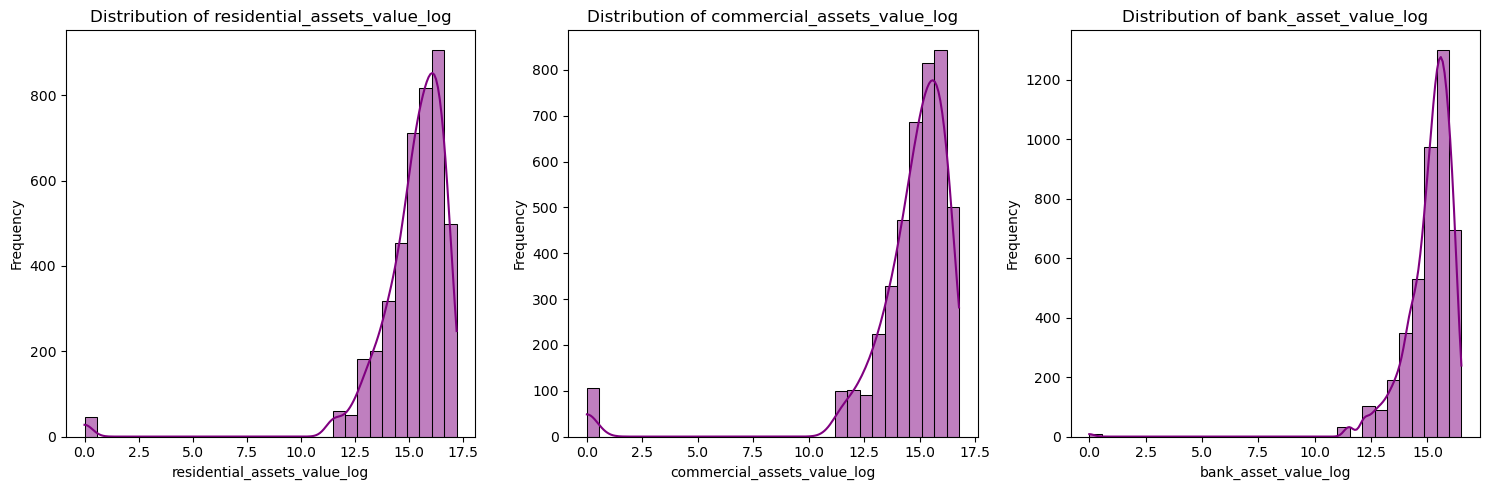

In [14]:
columns_transformed = ['residential_assets_value_log', 'commercial_assets_value_log', 'bank_asset_value_log']

# Histogram for every transformed column
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_transformed, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

After applying the logarithmic transformation, we observed that the data became left-skewed. While the transformation successfully reduced the impact of extreme values, it introduced a slight left skew in the distribution. This indicates that although the distribution is now more symmetrical compared to the original right-skewed data, the data may still require further adjustment.

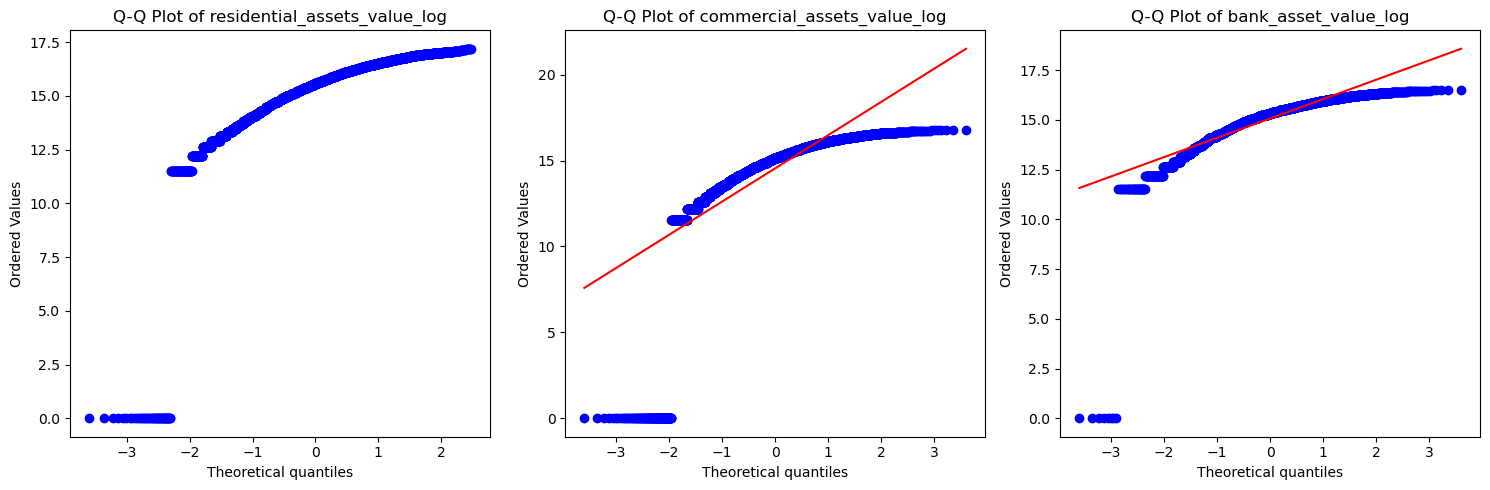

In [15]:
# Create Q-Q Plot to check normality
import scipy.stats as stats
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_transformed, 1):
    plt.subplot(1, 3, i)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()

The Q-Q plots indicate that the transformed data is generally close to a normal distribution, with most points aligning along the diagonal line. However, some deviations at the tails suggest that the distribution still exhibits slight skewness, particularly at the extremes. This suggests that while the transformation improved normality, the data may still have minor deviations from a perfect normal distribution.

In [16]:
# Check mean and median values
for column in columns_transformed:
    mean_value = data[column].mean()
    median_value = data[column].median()
    print(f"{column}: Mean = {mean_value}, Median = {median_value}")

residential_assets_value_log: Mean = 15.164525006675136, Median = 15.555976908243359
commercial_assets_value_log: Mean = 14.54504539152397, Median = 15.123843647884687
bank_asset_value_log: Mean = 15.079089166079154, Median = 15.341567078850604


In all three columns, the median exceeds the mean, indicating that the distribution is left-skewed. 

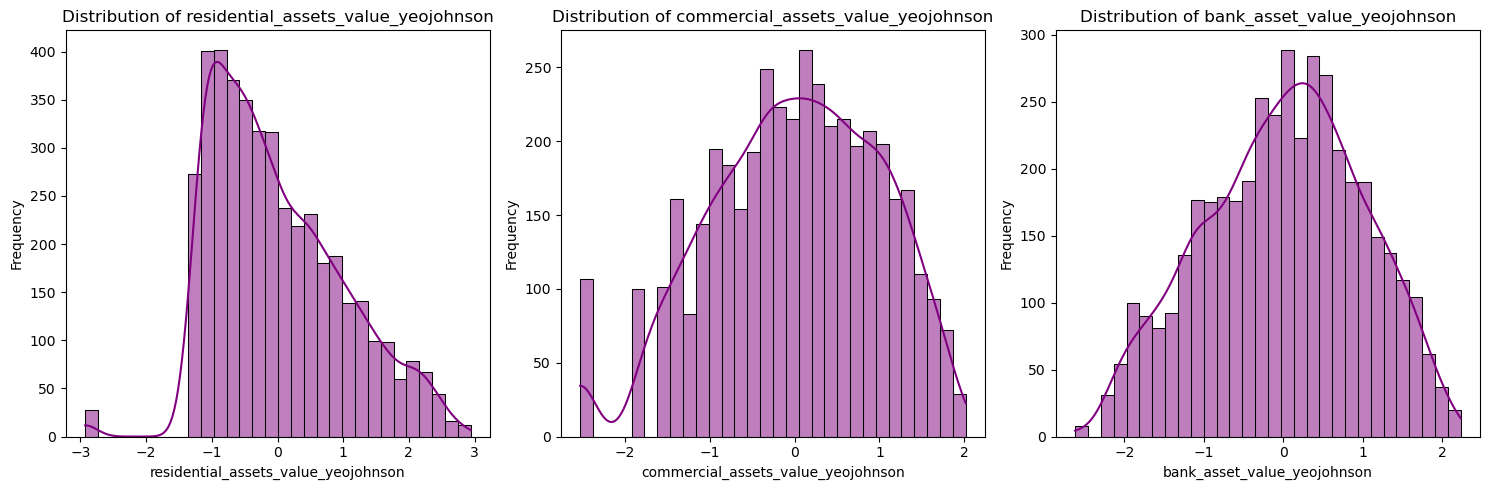

In [17]:
# Use Yeo-Johnson for transforming right-skewed data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

data['residential_assets_value_yeojohnson'] = pt.fit_transform(data[['residential_assets_value']])
data['commercial_assets_value_yeojohnson'] = pt.fit_transform(data[['commercial_assets_value']])
data['bank_asset_value_yeojohnson'] = pt.fit_transform(data[['bank_asset_value']]) 

columns_yeojohnson = ['residential_assets_value_yeojohnson', 'commercial_assets_value_yeojohnson', 'bank_asset_value_yeojohnson']

plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_yeojohnson, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

After the transformation, the distribution of the data became more symmetrical, and the points on the graphs show that the distribution is close to normal.

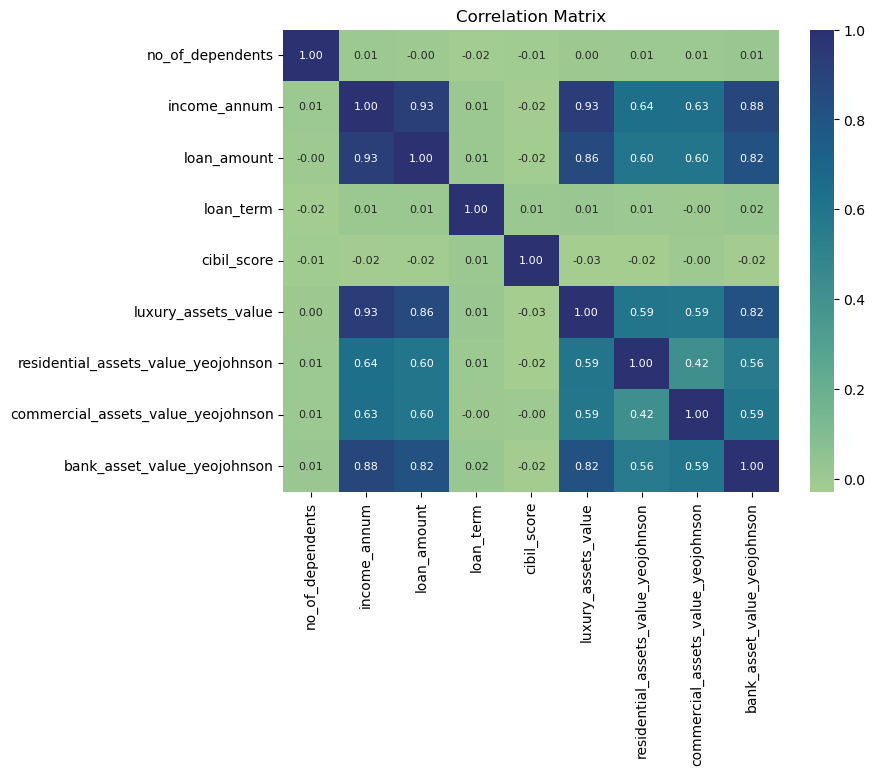

In [18]:
# Calculate the correlation matrix
columns_to_keep = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                   'luxury_assets_value', 'residential_assets_value_yeojohnson', 
                   'commercial_assets_value_yeojohnson', 'bank_asset_value_yeojohnson']
updated_data = data[columns_to_keep]
corr_matrix = updated_data.corr()

# Visualization of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

The correlation analysis reveals that loan_amount has the highest correlation with income_annum, indicating that higher incomes are closely associated with larger loan amounts. Additionally, strong positive correlations are observed between loan_amount and both luxury_assets_value and bank_asset_value_yeojohnson, suggesting that asset values also play a significant role in determining loan amounts. Other variables show weaker correlations, indicating less interdependence across most features.

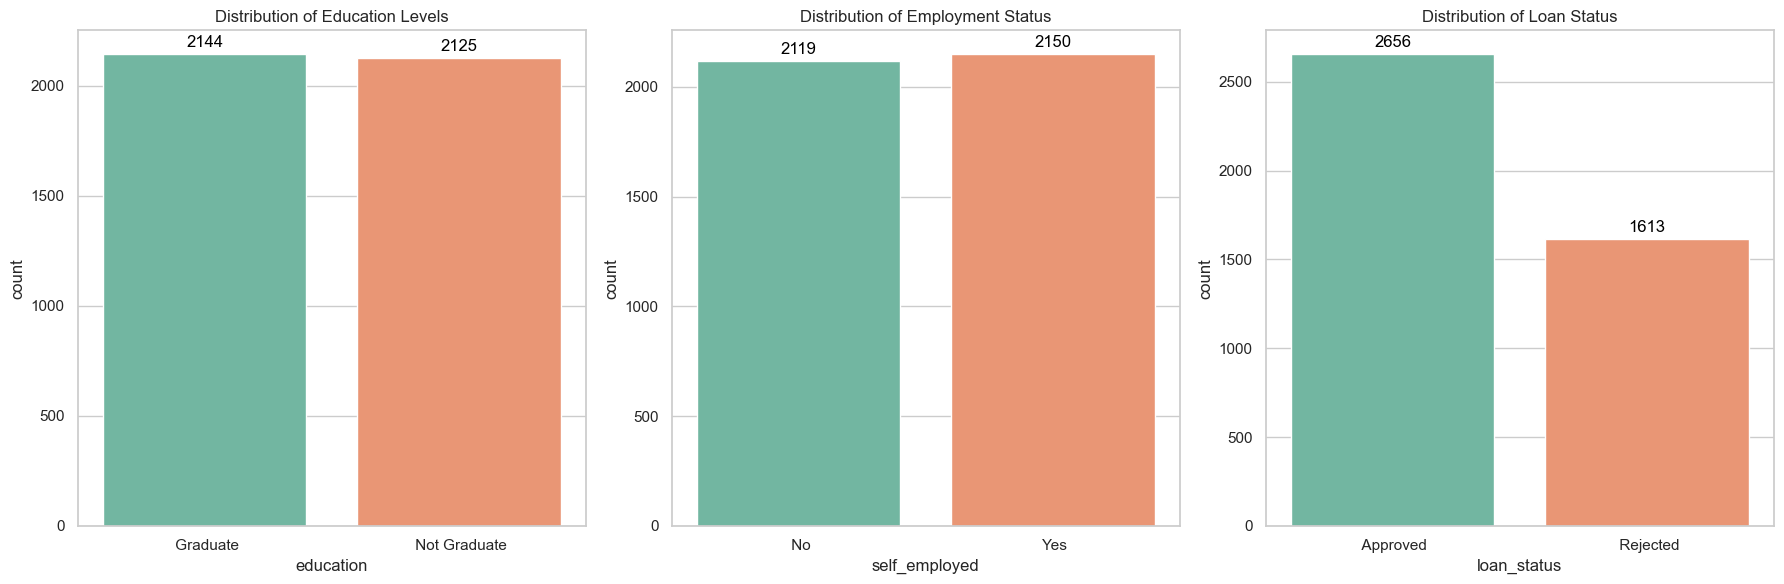

In [19]:
# Analysis of distribution for each categorical variable
plt.figure(figsize=(18,6))
sns.set_theme(style='whitegrid')
sns.set_palette('Set2')

plt.subplot(1,3,1)
sns.countplot(x='education', data=data)
plt.title('Distribution of Education Levels')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5),
                       textcoords='offset points')

plt.subplot(1,3,2)
sns.countplot(x='self_employed', data=data)
plt.title('Distribution of Employment Status')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5),
                       textcoords='offset points')

plt.subplot(1,3,3)
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

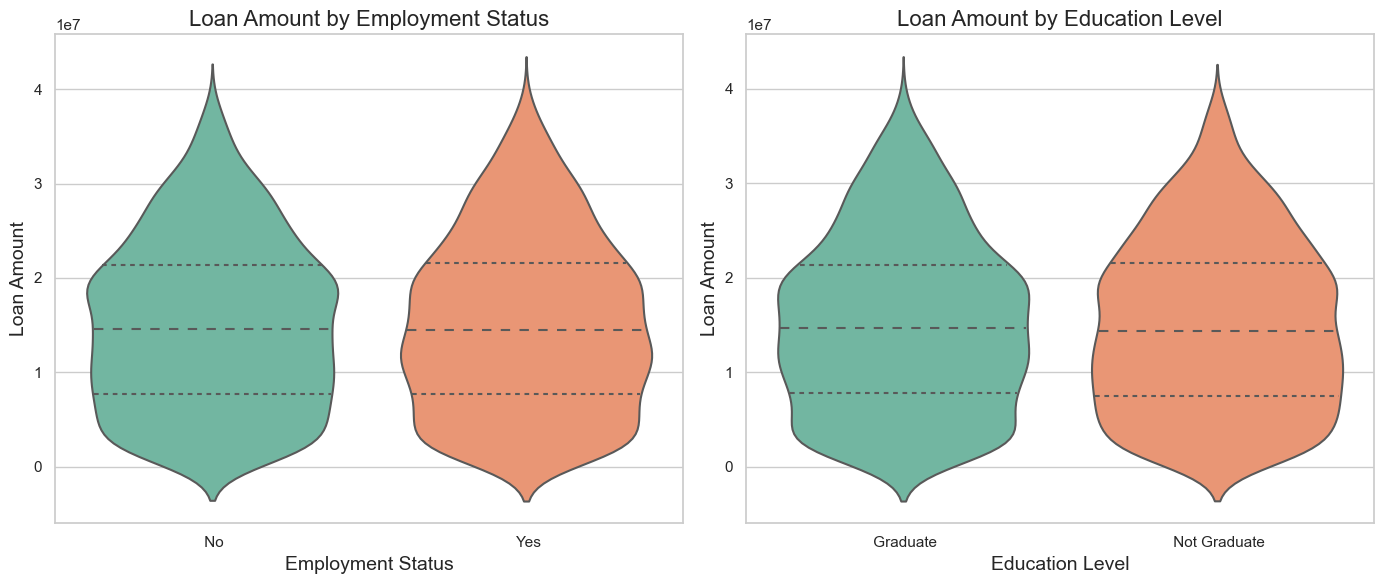

In [20]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.violinplot(x='self_employed', y='loan_amount', data=data, inner='quartile', scale='width')
plt.title('Loan Amount by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)


plt.subplot(1, 2, 2)
sns.violinplot(x='education', y='loan_amount', data=data, inner='quartile', scale='width')
plt.title('Loan Amount by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.tight_layout()
plt.show()

The violin plots reveal that the distribution of loan amounts varies slightly across employment status and education levels. For employment status, both self-employed and employed individuals show similar median loan amounts, but the distribution is slightly wider for self-employed, indicating more variability. In terms of education, higher education levels are associated with slightly larger loan amounts, though the overall distribution remains fairly consistent across education categories.

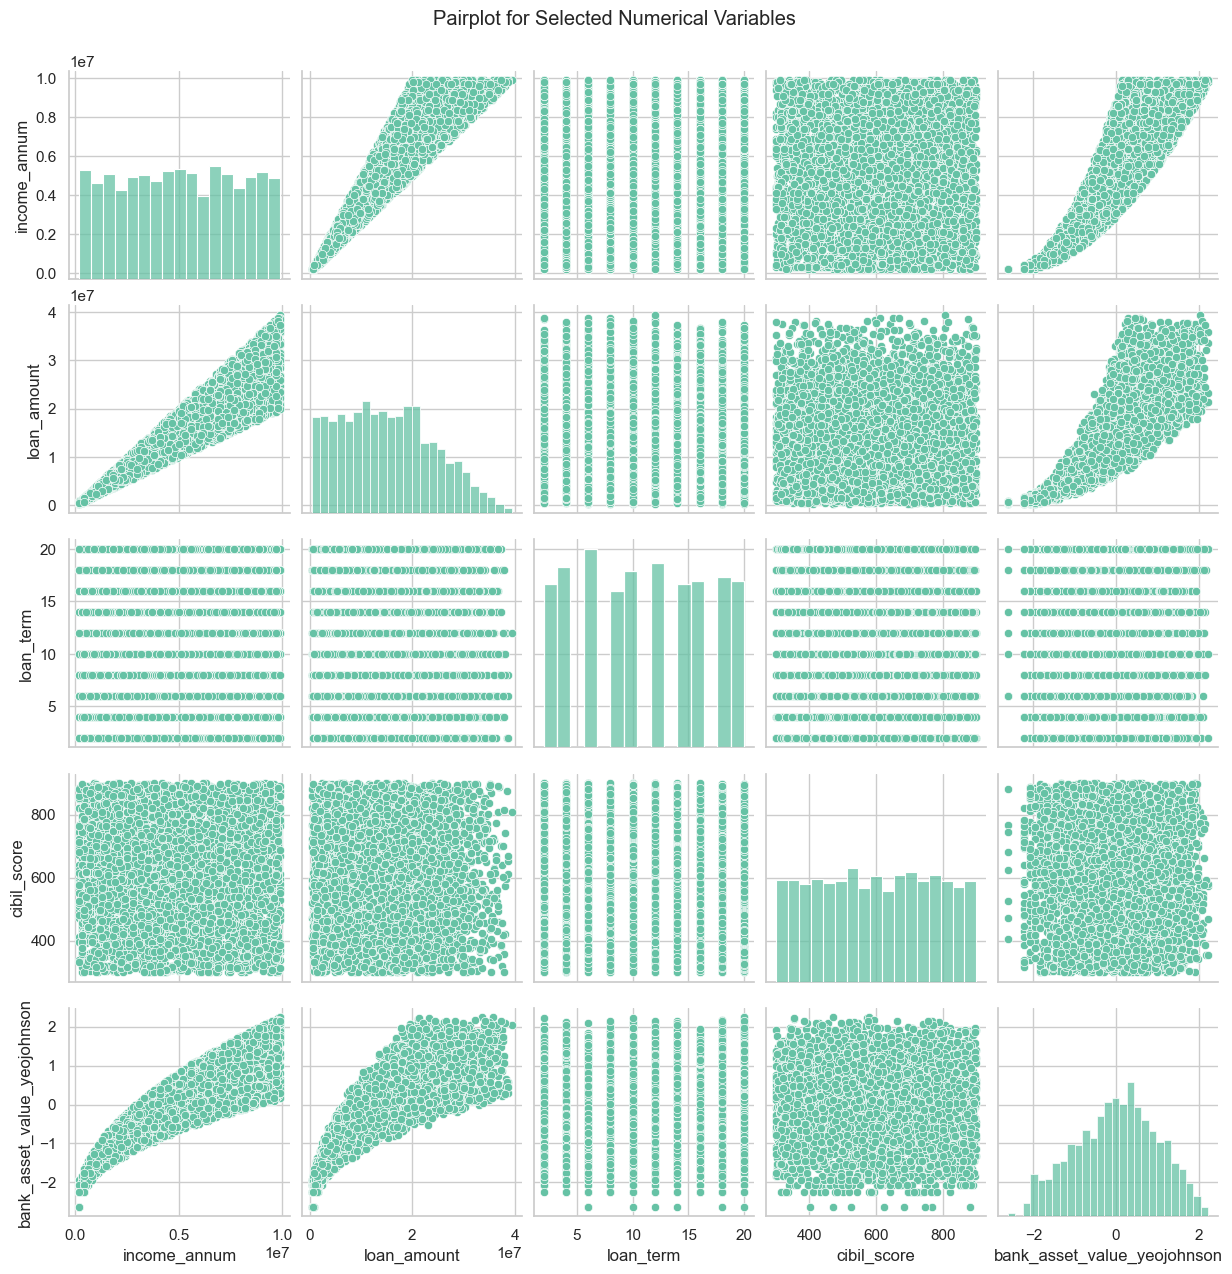

In [21]:
selected_columns = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'bank_asset_value_yeojohnson']
sns.pairplot(data[selected_columns])
plt.suptitle('Pairplot for Selected Numerical Variables', y=1.02)
plt.show()

The pairplot reveals key relationships among the variables in the loan approval dataset. A positive correlation is observed between income_annum and loan_amount, indicating that higher income applicants tend to request larger loans. The distribution of cibil_score shows most applicants have moderate to high credit scores, which likely influences approval decisions. Some outliers are present, particularly in loan_amount and bank_asset_value, which may require further attention. Overall, the plot provides a clear visualization of how financial metrics relate to loan characteristics.

## Step 3. Feature Engineering

### Creation of new features based on findings from EDA

In [24]:
# Total assets value

data['total_assets_value'] = (
    data['residential_assets_value_yeojohnson'] +
    data['commercial_assets_value_yeojohnson'] +
    data['luxury_assets_value'] +
    data['bank_asset_value_yeojohnson'] 
)

In [25]:
# Income to loan ratio
data['income_to_loan_ratio'] = data['income_annum'] / data['loan_amount']

In [27]:
# High CIBIL score: binary indicator (1 if CIBIL score >= 700, else 0)
data['high_cibil_score'] = data['cibil_score'].apply(lambda x: 1 if x >= 700 else 0)

In [28]:
# Loan term category: categorize loan term into Short, Medium, and Long Term
def categorize_loan_term(term):
    if term <= 6:
        return 'Short Term'
    elif 7 <= term <= 15:
        return 'Medium Term'
    else:
        return 'Long Term'

data['loan_term_category'] = data['loan_term'].apply(categorize_loan_term)

In [29]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,residential_assets_value_log,commercial_assets_value_log,bank_asset_value_log,residential_assets_value_yeojohnson,commercial_assets_value_yeojohnson,bank_asset_value_yeojohnson,total_assets_value,income_to_loan_ratio,high_cibil_score,loan_term_category
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,14.690980,16.683410,15.894952,-0.751598,1.868391,0.943431,2.270000e+07,0.321070,1,Medium Term
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,14.808763,14.603968,15.009433,-0.696278,-0.372538,-0.349390,8.799999e+06,0.336066,0,Medium Term
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,15.775605,15.319588,16.364956,0.031896,0.227494,1.906244,3.330000e+07,0.306397,0,Long Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,16.716932,15.009433,15.882373,1.584531,-0.050621,0.920694,2.330000e+07,0.267101,0,Medium Term
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,16.333207,15.919645,15.424949,0.804696,0.856714,0.185363,2.940000e+07,0.404959,0,Long Term


### Encoding Categorical Variables

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
# Make a copy of the original data
data_encoded = data.copy()

In [32]:
# One-Hot Encoding for 'loan_term_category'
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
loan_term_encoded = one_hot_encoder.fit_transform(data_encoded[['loan_term_category']])
loan_term_encoded_df = pd.DataFrame(loan_term_encoded, columns=one_hot_encoder.get_feature_names_out(['loan_term_category']))
data_encoded = pd.concat([data_encoded, loan_term_encoded_df], axis=1)

In [33]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
data_encoded['education'] = label_encoder.fit_transform(data_encoded['education'])
data_encoded['self_employed'] = label_encoder.fit_transform(data_encoded['self_employed'])
data_encoded['loan_status'] = label_encoder.fit_transform(data_encoded['loan_status'])

In [34]:
data_encoded.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'residential_assets_value_log', 'commercial_assets_value_log',
       'bank_asset_value_log', 'residential_assets_value_yeojohnson',
       'commercial_assets_value_yeojohnson', 'bank_asset_value_yeojohnson',
       'total_assets_value', 'income_to_loan_ratio', 'high_cibil_score',
       'loan_term_category', 'loan_term_category_Medium Term',
       'loan_term_category_Short Term'],
      dtype='object')

In [38]:
# List of columns to keep
columns_to_keep = ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                   'total_assets_value', 'income_to_loan_ratio', 'high_cibil_score', 'loan_term_category_Medium Term',
       'loan_term_category_Short Term', 'loan_status']

# Drop all other columns
data_encoded = data_encoded[columns_to_keep]

# Check the result
print(data_encoded.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'total_assets_value',
       'income_to_loan_ratio', 'high_cibil_score',
       'loan_term_category_Medium Term', 'loan_term_category_Short Term',
       'loan_status'],
      dtype='object')


### Feature Scalling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# List of numerical features to scale
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                   'total_assets_value', 'income_to_loan_ratio']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical features 
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Check the result
print(data_encoded.head())

   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          0              0      1.617979     1.633052   
1         -1.473548          1              1     -0.341750    -0.324414   
2          0.295621          0              0      1.439822     1.610933   
3          0.295621          0              0      1.119139     1.721525   
4          1.475067          1              1      1.689242     1.002681   

   loan_term  cibil_score  total_assets_value  income_to_loan_ratio  \
0   0.192617     1.032792            0.832028             -0.383614   
1  -0.508091    -1.061051           -0.694993             -0.181519   
2   1.594031    -0.544840            1.996519             -0.581364   
3  -0.508091    -0.771045            0.897943             -1.110968   
4   1.594031    -1.264055            1.568075              0.746968   

   high_cibil_score  loan_term_category_Medium Term  \
0                 1                             1.0   
1     

## Step 4. Model Building

0    0.62216
1    0.37784
Name: loan_status, dtype: float64


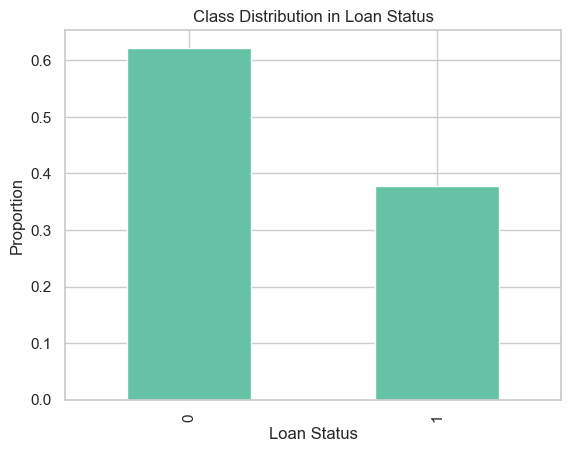

In [41]:
# Isolate the target variable and selected features from data_original
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']

# Check the balance of classes in the target variable
class_distribution = y.value_counts(normalize=True)
print(class_distribution)

# Visualize the distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()

### Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

# Perform Train-Test Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes in the training and test sets
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))

print("Class distribution in test set:")
print(y_test.value_counts(normalize=True))

Class distribution in training set:
0    0.622255
1    0.377745
Name: loan_status, dtype: float64
Class distribution in test set:
0    0.62178
1    0.37822
Name: loan_status, dtype: float64


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [46]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 55)

Results for Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.92      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

-------------------------------------------------------
Results for Decision Tree:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       531
           1       0.96      0.99      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

-------------------------------------------------------
Results for Random Forest:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       531
           1       1.00      0.99  

**Random Forest and Decision Tree:** Both models show high performance, which might indicate overfitting. This is especially true for Random Forest with its 100% accuracy. This could mean that the model has overfitted to the training data and may not perform as well on new, unseen data.

**Logistic Regression and SVM:** These models demonstrate slightly more realistic results in term of generalization to new data. However, there is room for improvement, particularly with minority class.

In [47]:
from sklearn.model_selection import cross_val_score

# Example with Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.99560761 0.99267936 0.99560761 0.99560761 0.99853587]
Mean cross-validation score: 0.9956076134699854


Cross-validation results show very high scores for each fold, as well as a high average score (0.9956). This indicates that the model demonstrates consistently high performance on different subsets of the data.

### Conlusion
The goal of this project was to develop a model to predict loan approval based on applicant characteristics, such as income, credit history, and assets value. The analysis revealed that income and credit history were the most significant predictors of loan approval. Applicants with higher incomes and higher cibil score had a much higher likelihood of loan approval, while other factors, played a smaller role.

Our predictive model achieved an accuracy of 99%, suggesting that it can effectively support lenders in making data-driven decisions. To improve loan approval processes, lenders should prioritize income verification and offer services to applicants with poor credit histories, such as credit improvement programs.